# [Mid test] - [DA12] 

# [Test 1] - Predict Used Car price (Linear – Polynomial Regression ) 

<h1><font color = 'Blue'> House Price Prediction Project <font></h1>

<h2><font color = 'orange'> 1. Problem Definition: <font></h2>
    
* Goal:  Predict Used Car price
* Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

<h2><font color = 'orange'> 2. Feature Selections: <font></h2>    

* Choose features to train ML model (Feature Engineering)
* Need to use `Feature Engineering` to identify Features needed

<h2><font color = 'orange'> 3. Spliting Datasets <font></h2>    

* `data`: dataset
* `X`: data [feature]
* `y`: target variable `SalePrice`

<h2><font color = 'orange'> 4. Training Machine Learning Model <font></h2>

<h2><font color = 'orange'> 5. Model Evaluation <font></h2>    


In [1]:
# import lib
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('ggplot')

print("Import done")

Import done


In [2]:
# Load dataset
pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data")

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


## Metadata - Attribute Information:

**Ta có tổng cộng 26 cột trong dataset**    

| No  | Table                  | Describe                                 | Note |
| --- | -------------------    | ---------------------------------------- | --------------------------------------------- |
|  1  | `symboling`      | -3, -2, -1, 0, 1, 2, 3  |  |
|  2  | `normalized-losses`        | continuous from 65 to 256|  |
|  3  | `make` | alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo |  |
|  4  | `fuel-type`          | diesel, gas | |
|  5  | `aspiration`   | std, turbo | |
|  6  | `num-of-doors`                | four, two |  |
|  7  | `body-style`| hardtop, wagon, sedan, hatchback, convertible   | |
|  8  | `drive-wheels` | 4wd, fwd, rwd | |   
|  9  | `engine-location`  | front, rear |    
|  10 | `wheel-base`  | continuous from 86.6 120.9    |     |    
|  11 | `length`         | continuous from 141.1 to 208.1 | |    
|  12 | `width`                | continuous from 60.3 to 72.3  |  |    
|  13 | `height`               | continuous from 47.8 to 59.8 |  |    
|  14 | `curb-weight`    | continuous from 1488 to 4066  |   |    
|  15 | `engine-type`  | dohc, dohcv, l, ohc, ohcf, ohcv, rotor |   |    
|  16 | `num-of-cylinders`  | eight, five, four, six, three, twelve, two |   |    
|  17 | `engine-size`  | continuous from 61 to 326 |   |    
|  18 | `fuel-system`  | 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi |   |    
|  19 | `bore`  | continuous from 2.54 to 3.94 |   |    
|  20 | `stroke`  | continuous from 2.07 to 4.17. |   |    
|  21 | `compression-ratio`  | continuous from 7 to 23 |   |    
|  22 | `horsepower`  | continuous from 48 to 288 |   |    
|  23 | `peak-rpm`  | continuous from 4150 to 6600 |   |    
|  24 | `city-mpg`  | continuous from 13 to 49 |   |    
|  25 | `highway-mpg`  | continuous from 16 to 54 |   |    
|  26 | `price`  | continuous from 5118 to 45400 |  **Target** |    
  

In [3]:
# Chỉnh lại tên các cột trong dataset
car_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data',
                     names=['symboling', 'normalized-losses','make','fuel-type','aspiration','num-of-doors'
                                             ,'body-style','drive-wheels','engine-location','wheel-base','length',
                                             'width','height','curb-weight','engine-type','num-of-cylinders','engine-size',
                                             'fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm',
                                             'city-mpg','highway-mpg','price'],header=None)
car_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
# Visual
# vs = pd.plotting.scatter_matrix(car_df, c = 'price', figsize = [8,8], s = 150, maker = '0')

## EDA - Exploratory data analysis


In [5]:
# Thông tin dữ liệu
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

<strong> <font color = 'red'> Type của dataset ko hợp lý <font>

In [6]:
# Thống kê dữ liệu
car_df.describe(include = "all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [7]:
#Mối tương quan
car_df.corr()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.178515,-0.035823,0.034606
wheel-base,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.249786,-0.470414,-0.544082
length,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.158414,-0.670909,-0.704662
width,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.181129,-0.642704,-0.677218
height,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.261214,-0.048640,-0.107358
curb-weight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.151362,-0.757414,-0.797465
engine-size,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.028971,-0.653658,-0.677470
compression-ratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,1.000000,0.324701,0.265201
city-mpg,-0.035823,-0.470414,-0.670909,-0.642704,-0.048640,-0.757414,-0.653658,0.324701,1.000000,0.971337
highway-mpg,0.034606,-0.544082,-0.704662,-0.677218,-0.107358,-0.797465,-0.677470,0.265201,0.971337,1.000000


### Kiểm tra 

In [8]:
#Replace "?" values = null values  
car_df.replace("?", np.nan, inplace = True)
car_df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [9]:
# thống kê các cột thiếu bao nhiêu giá trị
for col in car_df.columns:
    missing_data = car_df[col].isna().sum()
    missing_percent = missing_data/len(car_df)*100
    print(f"Column {col}: has {missing_percent} % missing_data")

Column symboling: has 0.0 % missing_data
Column normalized-losses: has 20.0 % missing_data
Column make: has 0.0 % missing_data
Column fuel-type: has 0.0 % missing_data
Column aspiration: has 0.0 % missing_data
Column num-of-doors: has 0.975609756097561 % missing_data
Column body-style: has 0.0 % missing_data
Column drive-wheels: has 0.0 % missing_data
Column engine-location: has 0.0 % missing_data
Column wheel-base: has 0.0 % missing_data
Column length: has 0.0 % missing_data
Column width: has 0.0 % missing_data
Column height: has 0.0 % missing_data
Column curb-weight: has 0.0 % missing_data
Column engine-type: has 0.0 % missing_data
Column num-of-cylinders: has 0.0 % missing_data
Column engine-size: has 0.0 % missing_data
Column fuel-system: has 0.0 % missing_data
Column bore: has 1.951219512195122 % missing_data
Column stroke: has 1.951219512195122 % missing_data
Column compression-ratio: has 0.0 % missing_data
Column horsepower: has 0.975609756097561 % missing_data
Column peak-rpm: 

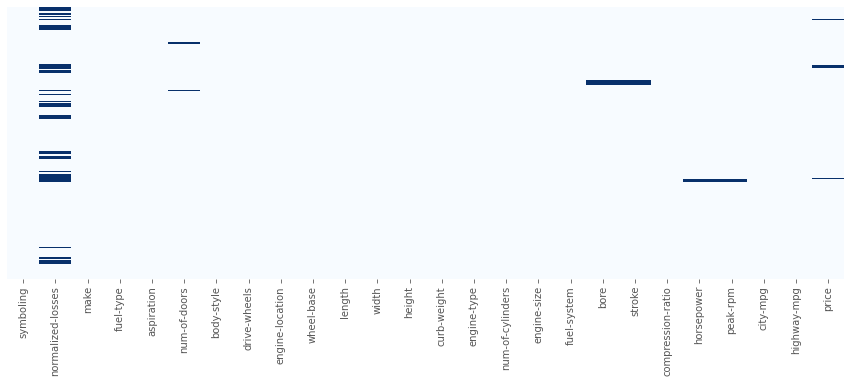

In [10]:
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(car_df.isna(), cmap="Blues", cbar=False, yticklabels=False);

<strong> <font color = 'red'> Các cột thiếu nhiều giá trị <font>



<h2><font color = 'orange'> Data Imputation (Missing Data Replacement): <font></h2>

Thay thế dữ liệu thiếu trong bộ dataset (missing data) là nguyên nhân dẫn đến các vẫn đề trong các thuật toán machine learning. Bước này giúp cho các mô hình máy học và dự đoán chạy chính xác hơn.

In [11]:
#Kiểm tra giá chị trung bình của các biến có giá trị NaN 
print("Average of normalized-losses:","%.3f" % car_df["normalized-losses"].astype("float").mean(axis=0))
print("Average of bore:","%.3f" % car_df['bore'].astype('float').mean(axis=0))
print("Average of horsepower:", "%.3f" % car_df['horsepower'].astype('float').mean(axis=0))
print("Average of peak rpm:", "%.3f" % car_df['peak-rpm'].astype('float').mean(axis=0))
print("Average of stroke:", "%.3f" % car_df['stroke'].astype('float').mean(axis=0))

Average of normalized-losses: 122.000
Average of bore: 3.330
Average of horsepower: 104.256
Average of peak rpm: 5125.369
Average of stroke: 3.255


In [12]:
#Thay các giá trị NaN bằng Mean 
car_df["normalized-losses"].replace(np.nan, "%.3f" % car_df["normalized-losses"].astype("float").mean(axis=0), inplace=True)
car_df["bore"].replace(np.nan,"%.3f" % car_df['bore'].astype('float').mean(axis=0), inplace=True)
car_df['horsepower'].replace(np.nan,"%.3f" % car_df['horsepower'].astype('float').mean(axis=0), inplace=True)
car_df['peak-rpm'].replace(np.nan, "%.3f" % car_df['peak-rpm'].astype('float').mean(axis=0), inplace=True)
car_df['stroke'].replace(np.nan, "%.3f" % car_df['stroke'].astype('float').mean(axis=0), inplace=True)

In [13]:
# xử lý NaN trong cột Num-Of-Doors 
car_df['num-of-doors'].value_counts()
print("Maximum occurence value of Num-Of-Doors is :",car_df['num-of-doors'].value_counts().idxmax())

Maximum occurence value of Num-Of-Doors is : four


In [14]:
#Thay giá trị NaN của cột num-of-doors bằng giá trị max
car_df["num-of-doors"].replace(np.nan, car_df['num-of-doors'].value_counts().idxmax(), inplace=True)

**Do một chiếc xe oto bình thường sẽ có 4 cửa nên ta sẽ thay giá trị NaN trong cột Num-Of-Doors bằng 4**

In [15]:
#Bỏ các giá trị NaN của Price
car_df.dropna(subset=["price"], axis=0, inplace=True)

**Do cột Price là Yhat (biến phụ thuộc) - kết quả dự đoán nên ta sẽ bỏ các giá trị NaN trong cột Price**

In [16]:
# Load lại dữ liệu
car_df.reset_index(drop=True,inplace=True)
car_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.000,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.000,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.000,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [17]:
#Kiểm tra lại datatype
car_df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [18]:
# Đổi các biến thành dạng numerical 
car_df[["normalized-losses","bore", "stroke","price","peak-rpm","horsepower"]] = car_df[["normalized-losses","bore", "stroke","price","peak-rpm","horsepower"]].astype("float")

In [19]:
#Kiểm tra lại datatype
car_df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [20]:
#Thống kê dữ liệu
car_df.describe(include = "all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201,201,201,201,201,201,201,201.000000,...,201.000000,201,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,181,165,115,94,118,198,NaN,...,NaN,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.840796,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,...,126.875622,NaN,3.330697,3.256866,10.164279,103.405532,5117.665363,25.179104,30.686567,13207.129353
std,1.254802,31.99625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,...,41.546834,NaN,0.268072,0.316048,4.004965,37.365699,478.113805,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,98.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5125.369000,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


## Feature Scaling

* `Normalisation`
* `Standardisation`

Các điểm dữ liệu đôi khi được đo đạc với những đơn vị khác nhau, (m, feet, km). Hoặc có hai thành phần (của vector dữ liệu) chênh lệch nhau quá lớn (VD: 1 giá trị trong cột từ 0 đến 1000, cột còn lại kia chỉ có khoảng giá trị từ 0 đến 1) nên ta phải tiến hành scaling dữ liệu để mô hình khi train ổn định. 

In [21]:
# Standardisation
# Do các đơn vị được tính bằng dặm nên ta đổi dữ liệu trong cột thành kilomet để phù hợp cho việc tính toán và dự đoán ra kết quả mô hình
# Đổi Miles Per Gallon to thành Litres per 100 kilometres
## Ta lấy 235 chia cho mpg)
car_df['city-Litres/100km'] = 235/car_df["city-mpg"]
car_df['highway-Litres/100km'] = 235/car_df["highway-mpg"]

In [22]:
# Normalisation
# Do sự chênh lệch dữ liệu của 3 cột kích thước cách nhau 1 khoảng khá lớn nên ta tiến hành bình thường hóa dữ liệu để thống nhất cùng 1 khoảng giá trị
car_df['length_normalized'] = car_df['length']/car_df['length'].max()
car_df['width_normalized'] = car_df['width']/car_df['width'].max()
car_df['height_normalized'] = car_df['height']/car_df['height'].max()

In [23]:
car_df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-Litres/100km,highway-Litres/100km,length_normalized,width_normalized,height_normalized
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139987,-0.008199,...,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.365404,-0.242423,-0.550160
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029846,0.055022,...,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,0.181189,0.019424,0.086802,-0.373737
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493234,0.158033,...,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.876024,0.814507,0.590742
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608963,0.123964,...,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.707108,1.000000,0.857170,0.492063
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544884,0.188824,...,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.857170,1.000000,0.306002
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180417,-0.060617,...,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.084301,0.492063,0.306002,1.000000
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644055,0.167445,...,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.880665,0.866201,0.307581
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572585,0.205963,...,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.685025,0.729436,0.074694
bore,-0.139987,-0.029846,0.493234,0.608963,0.544884,0.180417,0.644055,0.572585,1.000000,-0.055390,...,0.566939,-0.267357,-0.582051,-0.591330,0.543155,0.554640,0.559134,0.608963,0.544884,0.180417
stroke,-0.008199,0.055022,0.158033,0.123964,0.188824,-0.060617,0.167445,0.205963,-0.055390,1.000000,...,0.098263,-0.063611,-0.033921,-0.034606,0.082270,0.036090,0.047057,0.123964,0.188824,-0.060617


**Bộ dataset có cả dữ liệu đinh tính (qualitative (nominal) data) và định lượng nên ta chỉ xem xét sự tương quan giữa các biến có dạng numerical với nhau.**

In [24]:
#irrelevant fields
ccorr = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','engine-type','num-of-cylinders','fuel-system','bore','stroke','compression-ratio','peak-rpm','city-mpg','highway-mpg']
car_corr = car_df.drop(ccorr, axis=1)
#tính tương quan
car_corr = car_corr.corr()
car_corr

,length,width,height,curb-weight,engine-size,horsepower,price,city-Litres/100km,highway-Litres/100km,length_normalized,width_normalized,height_normalized
length,1.000000,0.857170,0.492063,0.880665,0.685025,0.579821,0.690628,0.657373,0.707108,1.000000,0.857170,0.492063
width,0.857170,1.000000,0.306002,0.866201,0.729436,0.615077,0.751265,0.673363,0.736728,0.857170,1.000000,0.306002
height,0.492063,0.306002,1.000000,0.307581,0.074694,-0.087027,0.135486,0.003811,0.084301,0.492063,0.306002,1.000000
curb-weight,0.880665,0.866201,0.307581,1.000000,0.849072,0.757976,0.834415,0.785353,0.836921,0.880665,0.866201,0.307581
engine-size,0.685025,0.729436,0.074694,0.849072,1.000000,0.822676,0.872335,0.745059,0.783465,0.685025,0.729436,0.074694
horsepower,0.579821,0.615077,-0.087027,0.757976,0.822676,1.000000,0.809575,0.889488,0.840608,0.579821,0.615077,-0.087027
price,0.690628,0.751265,0.135486,0.834415,0.872335,0.809575,1.000000,0.789898,0.801118,0.690628,0.751265,0.135486
city-Litres/100km,0.657373,0.673363,0.003811,0.785353,0.745059,0.889488,0.789898,1.000000,0.958306,0.657373,0.673363,0.003811
highway-Litres/100km,0.707108,0.736728,0.084301,0.836921,0.783465,0.840608,0.801118,0.958306,1.000000,0.707108,0.736728,0.084301
length_normalized,1.000000,0.857170,0.492063,0.880665,0.685025,0.579821,0.690628,0.657373,0.707108,1.000000,0.857170,0.492063


In [25]:
#ones_like build a matrix of booleans with out data - hàm one_like để tạo matrix của các toán tử boonleans (true,fasle)
ones_corr = np.ones_like(car_corr, dtype=bool)
# np's triu: hàm lấy 1 nửa tam giác của ma trận trên
mask = np.triu(ones_corr)
# Bỏ các cột lenght và lenght_normalize để visual đẹp hơn
adjust_mask = mask[1:, :-1]
adjust_car_corr = car_corr.iloc[1: ,:-1]

Text(0.0, 1.0, 'CORRELATION MATRIX\nCAR PRICE\n')

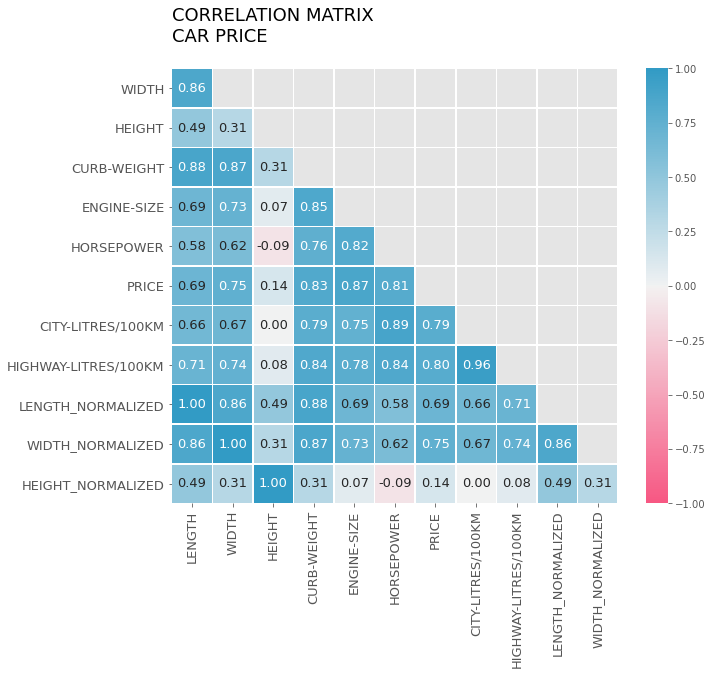

In [26]:
#Visual correlation
fig, ax = plt.subplots(figsize=(10,8))

#tạo bảng màu HUSL (Hsluv.org)
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True) 

sns.heatmap(data=adjust_car_corr, mask=adjust_mask,
           annot=True, annot_kws={"fontsize":13}, fmt=".2f", cmap =cmap,
           vmin=-1, vmax=1,
           linecolor='white',linewidths=0.5);

yticks = [i.upper() for i in adjust_car_corr.index]
xticks = [i.upper() for i in adjust_car_corr.columns]

ax.set_yticklabels(yticks, rotation=0, fontsize=13);
ax.set_xticklabels(xticks, rotation=90, fontsize=13);

title = 'CORRELATION MATRIX\nCAR PRICE\n'
ax.set_title(title, loc='left',fontsize=18)
#plt.savefig('ccorrr.svg') # đã export

###sử dụng pandas_profiling để review dữ liệu
import pandas as pd
!pip install pandas-profiling
from pandas_profiling import ProfileReport
design_report = ProfileReport(car_df)
design_report.to_file(output_file='report.html')

<AxesSubplot:xlabel='body-style', ylabel='price'>

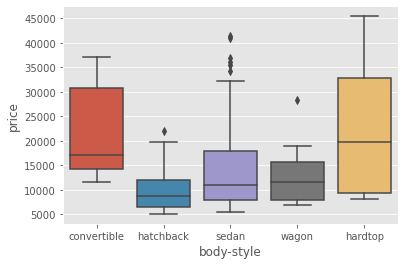

In [27]:
#Prices of car groups
sns.boxplot(x="body-style", y="price", data=car_df)

Ta thấy 7 biến (Feature) có sự tương quan tốt với price bao gồm : 
- `Length`
- `Width`
- `Curb-weight`
- `Engine-size`
- `Horsepower`
- `highway-Litres/100km`
- `city-Litres/100km`

<h1><font color = 'Blue'> Preprocessing <font></h1>

Text(0.5, 1.0, 'HORSEPOWER BINS')

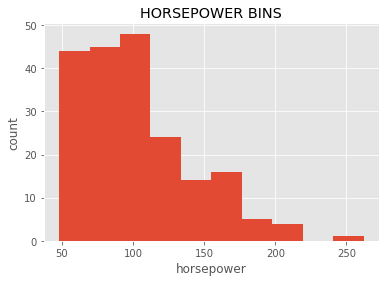

In [28]:
## Data Binning
#Kiểm tra phân phối dữ liệu của bảng Horsepower
plt.hist(car_df["horsepower"])
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("HORSEPOWER BINS")

Từ phân phối ta chia dữ liệu thành 3 nhóm: 50 đến 100, 100 đến 200, trên 200.

In [29]:
bins = np.linspace(min(car_df["horsepower"]),max(car_df["horsepower"]),4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [30]:
# Gán nhãn cho bin
bin_names = ['Low', 'Medium', 'High']

In [31]:
#đưa dữ liêu vào bin
car_df['horsepower-binned'] = pd.cut(car_df['horsepower'], bins, labels=bin_names ,include_lowest = True)
car_df[['horsepower','horsepower-binned']]

,horsepower,horsepower-binned
0,111.0,Low
1,111.0,Low
2,154.0,Medium
3,102.0,Low
4,115.0,Low
...,...,...
196,114.0,Low
197,160.0,Medium
198,134.0,Medium
199,106.0,Low


In [32]:
# Lọc ra các dòng xe có horsepower ở mức độ high
car_df[car_df['horsepower-binned'] == 'High']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-mpg,price,city-Litres/100km,highway-Litres/100km,length_normalized,width_normalized,height_normalized,horsepower-binned
46,0,122.0,jaguar,gas,std,two,sedan,rwd,front,102.0,...,5000.0,13,17,36000.0,18.076923,13.823529,0.921192,0.980556,0.799331,High
102,3,194.0,nissan,gas,turbo,two,hatchback,rwd,front,91.3,...,5200.0,17,23,19699.0,13.823529,10.217391,0.820279,0.943056,0.831104,High
123,3,122.0,porsche,gas,std,two,hardtop,rwd,rear,89.5,...,5900.0,17,25,32528.0,13.823529,9.400000,0.811629,0.902778,0.862876,High
124,3,122.0,porsche,gas,std,two,hardtop,rwd,rear,89.5,...,5900.0,17,25,34028.0,13.823529,9.400000,0.811629,0.902778,0.862876,High
125,3,122.0,porsche,gas,std,two,convertible,rwd,rear,89.5,...,5900.0,17,25,37028.0,13.823529,9.400000,0.811629,0.902778,0.862876,High


In [33]:
# Đếm xem có bao nhiêu giá trị trong horsepower-binned
car_df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

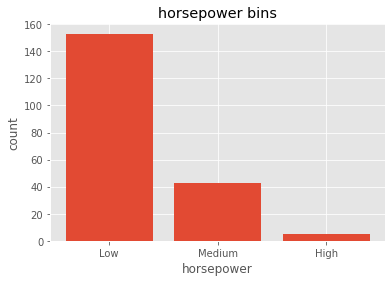

In [34]:
# số lượng loại xe có horsepower nhiều nhất
plt.bar(bin_names, car_df["horsepower-binned"].value_counts())
# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

<h3> <font color = "orange">Labelling Categories with Dummy variables <font> </h3>
    
Gán nhãn cho dữ liệu Categorie với các biến Dummy

In [35]:
# các cột trong bảng 
car_df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-Litres/100km', 'highway-Litres/100km',
       'length_normalized', 'width_normalized', 'height_normalized',
       'horsepower-binned'],
      dtype='object')

In [36]:
# gán dummy vào cột fuel-type, chia dữ liệu cột ra thành 2 cột nhỏ 
dummy_variable_1 = pd.get_dummies(car_df["fuel-type"])
dummy_variable_1

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
196,0,1
197,0,1
198,0,1
199,1,0


In [37]:
# ghép 2 cột mới vào dứ liệu
car_df = pd.concat([car_df, dummy_variable_1], axis=1)

In [38]:
# gán dummy vào cột fuel-type, chia dữ liệu cột ra thành 2 cột nhỏ 
dummy_variable_2 = pd.get_dummies(car_df["aspiration"])
dummy_variable_2

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
196,1,0
197,0,1
198,1,0
199,0,1


In [39]:
# ghép 2 cột mới vào dứ liệu
car_df = pd.concat([car_df,dummy_variable_2],axis=1)

In [40]:
# preview dữ liệu
car_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,city-Litres/100km,highway-Litres/100km,length_normalized,width_normalized,height_normalized,horsepower-binned,diesel,gas,std,turbo
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,11.190476,8.703704,0.811148,0.890278,0.816054,Low,0,1,1,0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,11.190476,8.703704,0.811148,0.890278,0.816054,Low,0,1,1,0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,12.368421,9.038462,0.822681,0.909722,0.876254,Medium,0,1,1,0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,9.791667,7.833333,0.848630,0.919444,0.908027,Low,0,1,1,0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,13.055556,10.681818,0.848630,0.922222,0.908027,Low,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,10.217391,8.392857,0.907256,0.956944,0.928094,Low,0,1,1,0
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,12.368421,9.400000,0.907256,0.955556,0.928094,Medium,0,1,0,1
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,13.055556,10.217391,0.907256,0.956944,0.928094,Medium,0,1,1,0
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,9.038462,8.703704,0.907256,0.956944,0.928094,Low,1,0,0,1


**Từ các biến tương quan tốt với nhau ta rút ra ở phần EDA, ta sẽ chạy `P-value` để kiểm tra xem liệu chúng có thực sự tác động đến giá không**

<h3><font color = 'orange'> Feature Selections: <font></h3>    

* Choose features to train ML model (Feature Engineering)
* Need to use `Feature Engineering` to identify Features needed

**Bảng so sánh giá trị P-value**    

| No  | P-value                  | Describe                                 | Note |
| --- | -------------------    | ---------------------------------------- | --------------------------------------------- |
|  1  | `< 0.001`      | correlation is very significant |  |
|  2  | `< 0.05`        | correlation is significant|  |
|  3  | `< 0.1` | the correlation is weakly significant |  |
|  4  | `> 0.1`  | no evidence that the correlation is significant | |

In [41]:
# import lib
import scipy.stats as stats

In [42]:
#kiểm tra biến horsepower với price bằng phương pháp tương quan pearson_coef
pearson_coef, p_value = stats.pearsonr(car_df['horsepower'], car_df['price'])
print("Correlation Coefficient is", pearson_coef, " while P-value is ", p_value)

Correlation Coefficient is 0.8095745869561718  while P-value is  6.368997860939056e-48


**-->  P Value < 0.001 Horsepower (Mã lực) ảnh hưởng đến giá xe Price**

In [43]:
#Engine Size vs Price
pearson_coef, p_value = stats.pearsonr(car_df['engine-size'], car_df['price'])
print("Correlation Coefficient is", pearson_coef, " while P-value is ", p_value)

Correlation Coefficient is 0.8723351674455185  while P-value is  9.265491622198389e-64


**-->  P Value < 0.001 Engine Size ảnh hưởng đến giá xe Price**

In [44]:
#Length vs Price
pearson_coef, p_value = stats.pearsonr(car_df['length'], car_df['price'])
print("Correlation Coefficient is", pearson_coef, " while P-value is ", p_value)

Correlation Coefficient is 0.6906283804483646  while P-value is  8.016477466157846e-30


**-->  P Value < 0.001 Length ảnh hưởng đến giá xe Price**

In [45]:
#Width vs Price 
pearson_coef, p_value = stats.pearsonr(car_df['width'], car_df['price'])
print("Correlation Coefficient is", pearson_coef, " while P-value is ", p_value)

Correlation Coefficient is 0.7512653440522679  while P-value is  9.200335510479947e-38


**-->  P Value < 0.001 Width ảnh hưởng đến giá xe Price**

In [46]:
#Curb weight vs Price
pearson_coef, p_value = stats.pearsonr(car_df['curb-weight'], car_df['price'])
print("Correlation Coefficient is", pearson_coef, " while P-value is ", p_value)

Correlation Coefficient is 0.8344145257702849  while P-value is  2.1895772388933803e-53


**-->  P Value < 0.001 Curb ảnh hưởng đến giá xe Price**

In [47]:
#City-Litres/100km vs Price
pearson_coef, p_value = stats.pearsonr(car_df['city-Litres/100km'], car_df['price'])
print("Correlation Coefficient is", pearson_coef, " while P-value is ", p_value)

Correlation Coefficient is 0.7898975136626946  while P-value is  3.9031064009392475e-44


<strong> <font color = "red"> -->  P Value < 0.001 `City-Litres` ảnh hưởng đến giá xe `Price` <font>
    

In [48]:
#Highway-Litres/100km vs Price
pearson_coef, p_value = stats.pearsonr(car_df['highway-Litres/100km'], car_df['price'])
print("Correlation Coefficient is", pearson_coef, " while P-value is ", p_value)

Correlation Coefficient is 0.801117626398197  while P-value is  3.0467845810420624e-46


<strong> <font color = "red"> -->  P Value < 0.001 `Highway-Litres` ảnh hưởng đến giá xe `Price` <font>

**---> Ta sẽ chọn 7 biến (Feature) để train mô hình, gồm:**
- `Length`
- `Width`
- `Curb-weight`
- `Engine-size`
- `Horsepower`
- `highway-Litres/100km`
- `city-Litres/100km`

<h3><font color = 'orange'> Training Machine Learning Model <font></h3>

**---> Ta sử dụng mô hình Multiple linear regression**

**Hệ phương trình Multiple linear regression có dạng:**
    
$$y = B_o + B_1x_1 + B_2x_2 + ... B_nx_n$$

- `y`: biến phụ thuộc
- $$x_n$$: biến độc lập

**Parameter - tham số:**
- $$B_o$$ : số chặn (intercept)

- $$ B_n$$ : slope độ dốc - coefficient

In [49]:
# Import mô hình
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [50]:
# xác định đầu vào của mô hình
X = car_df[['horsepower','curb-weight','engine-size','highway-Litres/100km','city-Litres/100km','length','width']]
y = car_df['price']

In [51]:
# chia dữ liệu ra thành 2 phần train test
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [52]:
# Fit 2 biến X, Y vào mô hình
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [53]:
# Dự đoán giá trị
yhat = lm.predict(X_test)

In [54]:
# 5 giá trị dự đoán đầu
yhat[0:5]

array([ 6859.07125078, 25120.71771903,  6097.07569507,  8067.80430938,
       13765.70420936])

In [55]:
# Rút ra số chặn
intercept = lm.intercept_
# Rút ra độ dốc
slopes = lm.coef_

intercept,slopes

(-46328.8417045379,
 array([ -6.79706517,   0.76106981,  86.83235411, 109.77306954,
        727.48420372,   9.79434796, 562.74819563]))

In [56]:
# in ra dự đoán
print("Price = -46328.84 - 6.797 x horsepower + 0.761 x curb-weight + 86.832 x engine-size + 109.773 x highway-litres/100km + 727.484 x city-litres/100km + 9.794 x length + 562.748 x width")

Price = -46328.84 - 6.797 x horsepower + 0.761 x curb-weight + 86.832 x engine-size + 109.773 x highway-litres/100km + 727.484 x city-litres/100km + 9.794 x length + 562.748 x width


In [57]:
X_test.head()

,horsepower,curb-weight,engine-size,highway-Litres/100km,city-Litres/100km,length,width
95,69.0,2008,97,6.351351,7.580645,162.4,63.8
15,182.0,3380,209,10.681818,14.687500,193.8,67.9
30,76.0,1819,92,6.184211,7.580645,144.6,63.9
158,70.0,2140,98,6.911765,8.392857,166.3,64.4
128,110.0,2658,121,8.392857,11.190476,186.6,66.5


In [58]:
# dự đoán giá trị mới 
lm.predict([[111, 2021, 209,7.184211, 8.392857, 186.6, 69]]) 

array([20154.32276248])

<h3><font color = 'orange'>  Model Evaluation <font></h3>    

In [59]:
# Các giá điểm của mô hình
print('The full R-square is : ',lm.score(X,y))
print('The train R-square is : ',lm.score(X_train,y_train))
print('The test R-square is : ',lm.score(X_test,y_test))


The full R-square is :  0.8054723434346781
The train R-square is :  0.8302428129429249
The test R-square is :  0.766523074597073


**R-square của mô hình có giá trị cao trên 76%**

In [60]:
# MSE , MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test,yhat)
mae = mean_absolute_error(y_test,yhat)
print('The MSE of price and predicted value is : ',mse)
print('The MSA of price and predicted value is : ',mae)

The MSE of price and predicted value is :  25195257.80146333
The MSA of price and predicted value is :  3365.195139165231


In [61]:
# kiểm tra tương quan bằng phương pháp pearsonr
from scipy.stats.stats import pearsonr

In [62]:
pearsonr(lm.predict(X_test),y_test)

(0.9134311711574044, 9.163215234481697e-21)

**--> Pearson's Correlation coefficient = ~0.91, 2 tailed p-value = ~0**

<h3><font color = 'orange'>  Model Evaluation Visualization <font></h3>    

<function matplotlib.pyplot.show(close=None, block=None)>

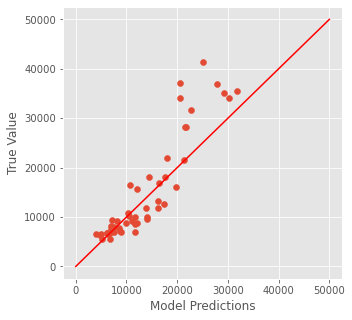

In [63]:
# Biểu đồ phân tán
plt.figure(figsize=(5,5))
plt.scatter(yhat,y_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([0, 50000],[0, 50000],'k-',color='r')
plt.show

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

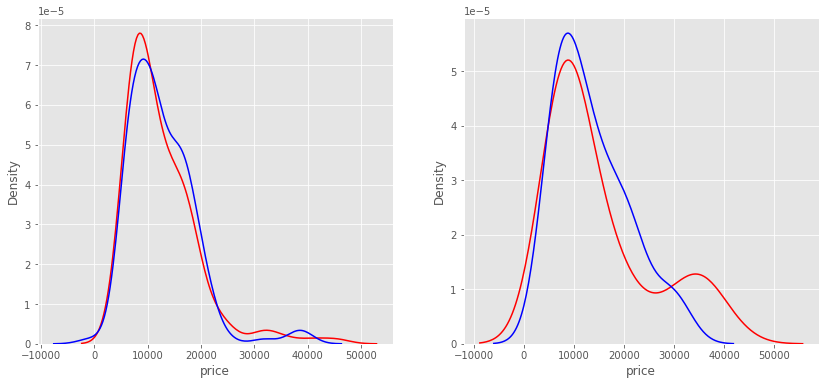

In [64]:
# Kiểm tra overfitting
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax1 = sns.distplot(y_train,hist=False,color="r",
                  label="Actual Train Values")
sns.distplot(lm.predict(X_train),hist=False,color="b",
           label = "Predicted Train Values",ax=ax1)
plt.subplot(1,2,2)
ax2 = sns.distplot(y_test,hist=False,color="r",
                 label="Actual Test Values")
sns.distplot(lm.predict(X_test),hist=False,color="b",
           label="Predicted Test Values",ax=ax2)
plt.show()

**Ta có thể thấy mô hình cho hiệu suất khá tốt ở các 2 trường hợp thực tế và dự đoán trong test dataset tuy nhiên trong tập dữ liệu thực tế lại cho thấy sự khác biệt xuất hiện từ khoảng giá 18000usd**

<strong> <font color = "red"> --> Mô hình này có thể là polynomial regression </font>

<h2><font color = 'orange'>  Polynomial regression model <font></h2>   
   

**Hệ phương trình Polynomial regression có dạng:**
    
$$y = b + \theta\_1  x + \theta\_2 x^2$$

- `y`: biến phụ thuộc
- `x`: biến độc lập
- `x^2` : bậc của mô hình
Parameter - tham số:
- `b`: số chặn (intercept)

- $$ \theta\ $$ : slope độ dốc - coefficient

In [65]:
#import model
from sklearn.preprocessing import PolynomialFeatures

In [66]:
# Tạo mô hình với đường cong là bậc 2
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

In [67]:
# Chia dữ liệu thành 2 phần train test
x1_train,x1_test,y1_train,y1_test = train_test_split(X_poly,y,random_state=42)

In [68]:
#tạo mô hình
lm1 = LinearRegression()
lm1.fit(x1_train,y1_train)

LinearRegression()

In [69]:
# Dự đoán biến phụ thuộc
yhat1 = lm1.predict(x1_test)

In [70]:
yhat1[0:5]

array([ 6600.27374268, 27386.32440948,  6219.2015152 ,  7871.91066742,
       14290.55852509])

In [71]:
# Tính R-square của mô hình
print('The full R-square is : ',lm1.score(X_poly,y))
print('The train R-square is : ',lm1.score(x1_train,y1_train))
print('The test R-square is : ',lm1.score(x1_test,y1_test))


The full R-square is :  0.8972125395697119
The train R-square is :  0.9104698120382844
The test R-square is :  0.876420310610514


<function matplotlib.pyplot.show(close=None, block=None)>

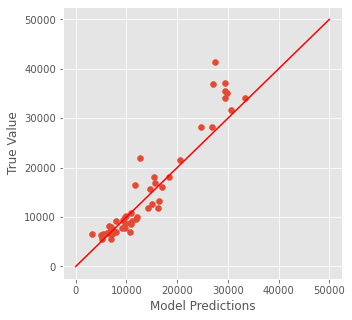

In [72]:
#Visual dữ liệu
plt.figure(figsize=(5,5))
plt.scatter(yhat1,y1_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([0, 50000],[0, 50000],'k-',color='r')
plt.show

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

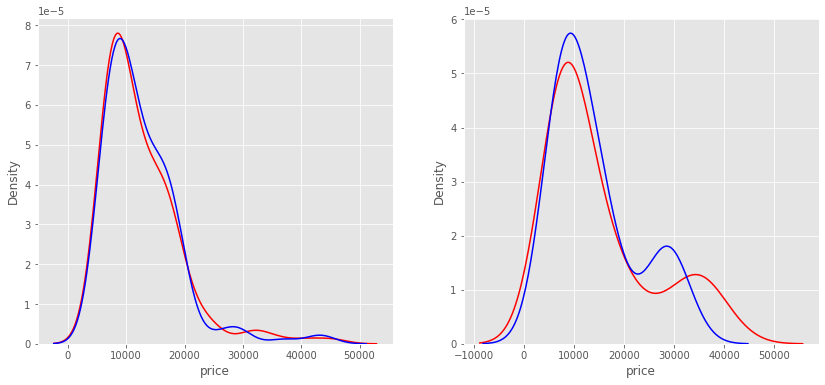

In [73]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax1 = sns.distplot(y1_train,hist=False,color="r",
                  label="Actual Train Values")
sns.distplot(lm1.predict(x1_train),hist=False,color="b",
           label = "Predicted Train Values",ax=ax1)
plt.subplot(1,2,2)
ax2 = sns.distplot(y1_test,hist=False,color="r",
                 label="Actual Test Values")
sns.distplot(lm1.predict(x1_test),hist=False,color="b",
           label="Predicted Test Values",ax=ax2)
plt.show()

**Với (đường hồi quy đa thức) polynomial là bậc 2 thì mô hình cho ta kết quả tốt hơn**

In [74]:
# Chạy mô hình ở các trường hợp khác (difference degree)
i = 3 
while i <= 10 : 
  poly_reg = PolynomialFeatures(degree=i)
  X_poly = poly_reg.fit_transform(X)
  x1_train,x1_test,y1_train,y1_test = train_test_split(X_poly,y,random_state=42)
  lm1 = LinearRegression()
  lm1.fit(x1_train,y1_train)
  yhat1 = lm1.predict(x1_test)
  print('At i =',i)
  print('The full R-square is : ',lm1.score(X_poly,y))
  print('The train R-square is : ',lm1.score(x1_train,y1_train))
  print('The test R-square is : ',lm1.score(x1_test,y1_test))
  print(' ')
  i += 1 

At i = 3
The full R-square is :  -11.604779855391499
The train R-square is :  0.9790245501259055
The test R-square is :  -27.902717074329825
 
At i = 4
The full R-square is :  -55405.69120559784
The train R-square is :  0.9989856553858164
The test R-square is :  -127162.02980530086
 
At i = 5
The full R-square is :  -93471.95461068387
The train R-square is :  0.9989858609281032
The test R-square is :  -214527.3160385732
 
At i = 6
The full R-square is :  -268379.40842108725
The train R-square is :  0.9989852777712578
The test R-square is :  -615954.679785653
 
At i = 7
The full R-square is :  -901455.3757972117
The train R-square is :  0.9989857524315449
The test R-square is :  -2068917.438659619
 
At i = 8
The full R-square is :  -2709695.0455318247
The train R-square is :  0.9989853954991902
The test R-square is :  -6218980.0450966805
 
At i = 9
The full R-square is :  -4257935.735668685
The train R-square is :  0.9989818814053817
The test R-square is :  -9772323.056776948
 
At i = 1

<h1><strong> <font color = "red" >Chúng ta có thể thấy rằng bắt đầu từ degree = 2, nếu chúng ta tăng bậc của polynomial regression, kết quả sẽ bị overfitting. => Kết quả tốt nhất là đa thức có bậc = 2 <font><h1>

### Author
 
[**Phạm Thanh Nam**](https://nampham111.wordpress.com/contact/) - DA12


### Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                  |
| ----------------- | ------- | ---------- | ----------------------------------- |
| 2022-04-04        | 1.0     | Nam     | Up to colab     |

